## [P] 2.3.1 Basic Commands

In [2]:
import numpy as np
from scipy.stats import pearsonr

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

import math

import pandas as pd

%matplotlib inline
pd.set_option("display.precision", 2) # number precision for pandas
plt.style.use('seaborn-v0_8') # pretty matplotlib plots

In [3]:
# array creation
x = np.array([1,6,2])
y = np.array([1,4,3])
len(x), len(y)

(3, 3)

In [4]:
# array operations
x+y

array([ 2, 10,  5])

In [5]:
# matrix creation
x = np.asmatrix(np.arange(1,5).reshape(2,2).transpose())
x

matrix([[1, 3],
        [2, 4]])

In [6]:
# matrix operations
np.power(x, 2)

matrix([[ 1,  9],
        [ 4, 16]])

In [7]:
# random normal distribution & correlation
x = np.random.normal(size=50)
y = x + np.random.normal(loc=50, scale=1, size=50)
pearsonr(x,y)[0]

0.7038971833246831

In [8]:
# random seed and basic statistical functions
np.random.seed(3)
y = np.random.normal(size=100)
y.mean(), y.var(), np.sqrt(y.var()), y.std()

(-0.10863707440606224,
 1.132081888283007,
 1.0639933685333791,
 1.0639933685333791)

## Matplotlib

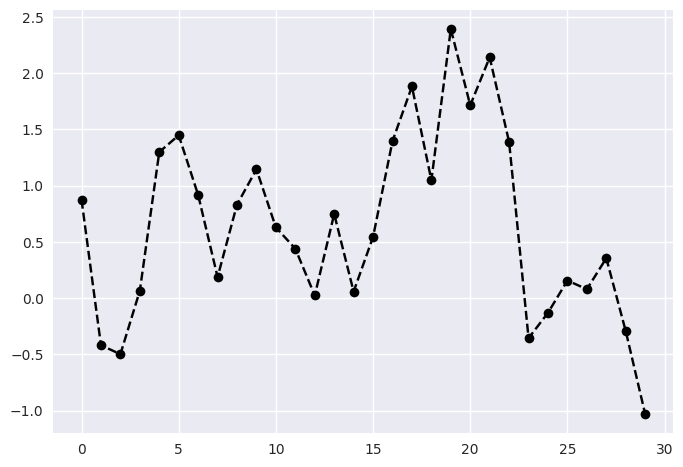

In [9]:
plt.plot(np.random.randn(30).cumsum(), 'ko--')

## [P] 2.3.2 Graphics

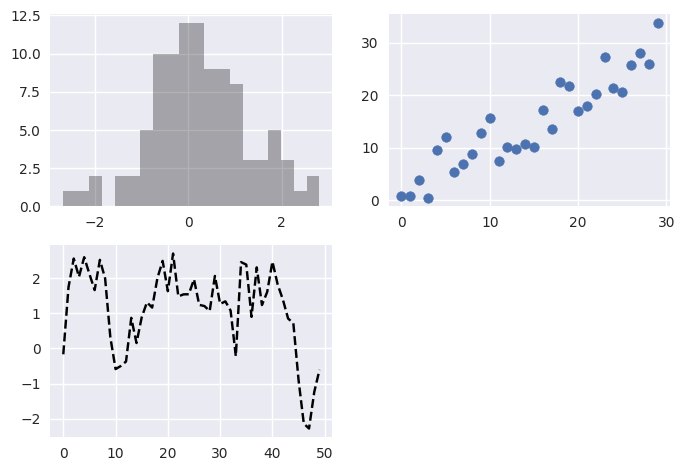

In [10]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
plt.plot(np.random.randn(50).cumsum(), 'k--')
_ = ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30)+ 3 * np.random.randn(30))

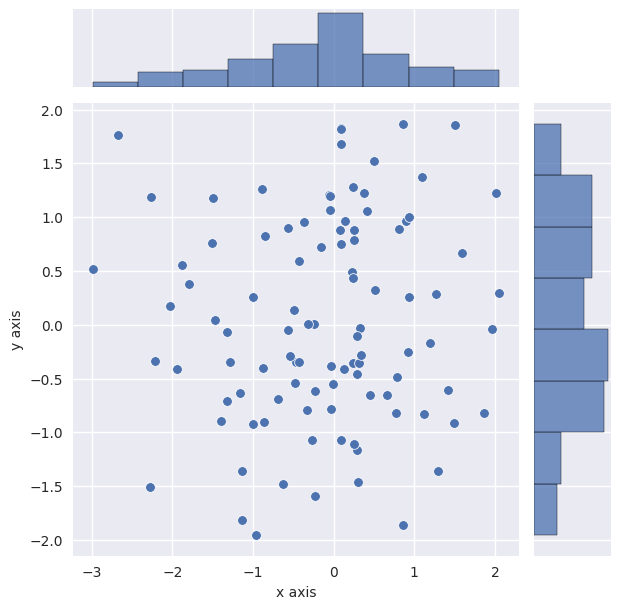

In [11]:
x = np.random.normal(size=100)
y= np.random.normal(size=100)

# seaborn scatterplot
p = sns.jointplot(x=x, y=y, kind ='scatter')
p.set_axis_labels(xlabel='x axis', ylabel='y axis');

In [12]:
# create a sequence of numbers
x = np.arange(1,11)
x

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [13]:
# linearly spaced numbers
x = np.linspace(-np.pi, np.pi, num=50)
x

array([-3.14159265, -3.01336438, -2.88513611, -2.75690784, -2.62867957,
       -2.5004513 , -2.37222302, -2.24399475, -2.11576648, -1.98753821,
       -1.85930994, -1.73108167, -1.60285339, -1.47462512, -1.34639685,
       -1.21816858, -1.08994031, -0.96171204, -0.83348377, -0.70525549,
       -0.57702722, -0.44879895, -0.32057068, -0.19234241, -0.06411414,
        0.06411414,  0.19234241,  0.32057068,  0.44879895,  0.57702722,
        0.70525549,  0.83348377,  0.96171204,  1.08994031,  1.21816858,
        1.34639685,  1.47462512,  1.60285339,  1.73108167,  1.85930994,
        1.98753821,  2.11576648,  2.24399475,  2.37222302,  2.5004513 ,
        2.62867957,  2.75690784,  2.88513611,  3.01336438,  3.14159265])

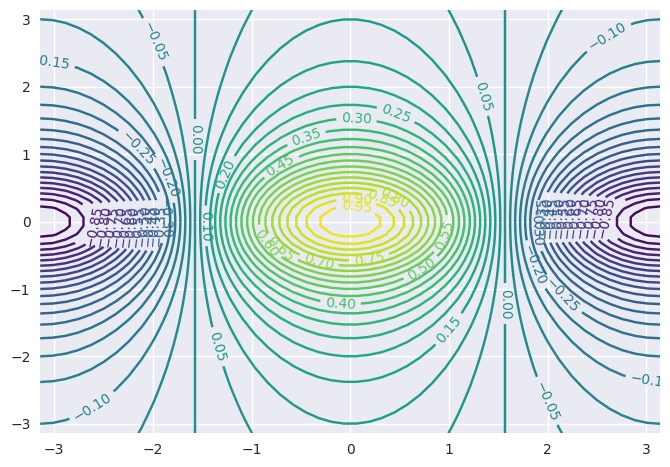

In [14]:
x = np.linspace(-np.pi, np.pi, num=50)
y= x

# simulating R outer function
def pf(a,b):
    return math.cos(b) / (1 + a**2)
f = np.empty((len(x), len(y)))

for i in range(len(x)):
    for j in range(len(y)):
        f[i,j] = pf(x[i], y[j])

# contour plot
cp = plt.contour(x,y,f, 45, cmap='viridis')
plt.clabel(cp, inline=1, fontsize=10);

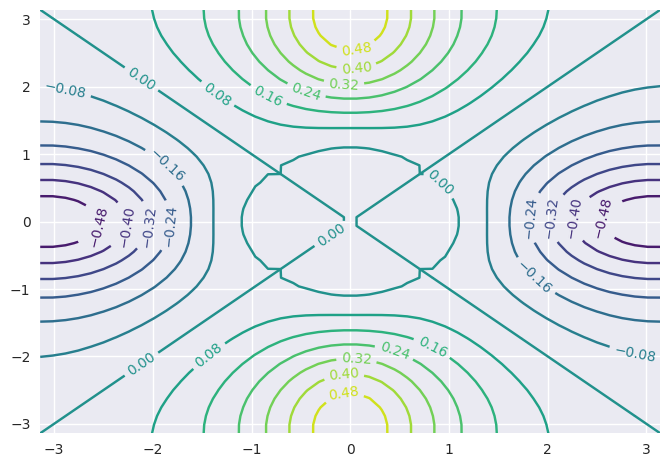

In [15]:
# contour 2 
fa = (f - f.transpose())/2
cp = plt.contour(x,y,fa,15, cmap='viridis')
plt.clabel(cp, inline=1, fontsize=10);

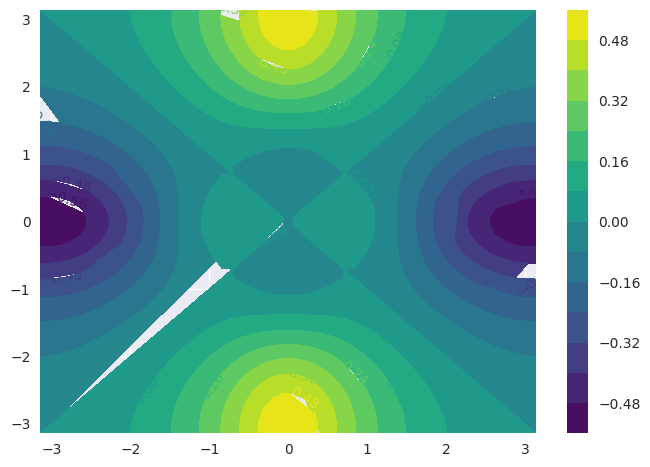

In [16]:
# heatmap
cp = plt.contourf(x,y,fa,15, cmap='viridis')
plt.clabel(cp, inline=1, fontsize=10)
plt.colorbar();

## [P] 2.3.3 Indexing Data

In [17]:
# matrix creation (R equivalent of matrix(1:16, 4, 4))
A = np.asmatrix(np.arange(1,17).reshape(4,4).transpose())
A

matrix([[ 1,  5,  9, 13],
        [ 2,  6, 10, 14],
        [ 3,  7, 11, 15],
        [ 4,  8, 12, 16]])

In [18]:
A[1,2]

10

In [19]:
# select a range of rows and columns
A[0:3, 1:4]

matrix([[ 5,  9, 13],
        [ 6, 10, 14],
        [ 7, 11, 15]])

In [20]:
# select a range of rows and all columns
A[0:2, :]

matrix([[ 1,  5,  9, 13],
        [ 2,  6, 10, 14]])

In [21]:
# select all rows and a range of columns
A[:, 0:2]

matrix([[1, 5],
        [2, 6],
        [3, 7],
        [4, 8]])

In [22]:
# shape of the matrix
A.shape

(4, 4)

## Pandas - Series

In [23]:
obj = pd.Series([4,7,-5,3], index=['d','b','a','c'])
obj

d    4
b    7
a   -5
c    3
dtype: int64

In [24]:
obj['a']

-5

In [25]:
sdata= {'Ohio':35000, 'Texax':71000, 'Oregon':16000, 'Utah':5000}
obj2 = pd.Series(sdata)
obj2

Ohio      35000
Texax     71000
Oregon    16000
Utah       5000
dtype: int64

## Pandas - DataFrame

In [26]:
data = {'state':['Ohio', 'Ohio', 'Ohio','Nevada','Nevada', 'Nevada'],
        'year':[2000, 2001, 2002, 2001, 2002, 2003],
        'pop' :[1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}
frame = pd.DataFrame(data)
frame

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,Nevada,2003,3.2


In [27]:
frame.head()

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9


In [28]:
pd.DataFrame(data, columns=['year', 'state', 'pop'])

,year,state,pop
0,2000,Ohio,1.5
1,2001,Ohio,1.7
2,2002,Ohio,3.6
3,2001,Nevada,2.4
4,2002,Nevada,2.9
5,2003,Nevada,3.2


## Pandas - Categorical data

In [29]:
fruits = ['apple', 'orange', 'apple','apple']*2
N =len(fruits)
df = pd.DataFrame({'fruits':fruits,
                   'basket_id':np.arange(N),
                   'count':np.random.randint(3,15,size=N),
                   'weight':np.random.uniform(0,4,size=N)},
                  columns=['basket_id', 'fruits', 'count', 'weight'])
df

,basket_id,fruits,count,weight
0,0,apple,4,1.81
1,1,orange,12,0.65
2,2,apple,9,2.57
3,3,apple,5,1.75
4,4,apple,14,1.32
5,5,orange,10,2.07
6,6,apple,12,3.96
7,7,apple,6,3.01


In [30]:
fruit_cat = df['fruits'].astype('category')
fruit_cat

0     apple
1    orange
2     apple
3     apple
4     apple
5    orange
6     apple
7     apple
Name: fruits, dtype: category
Categories (2, object): ['apple', 'orange']

In [31]:
c= fruit_cat.values
type(c)


pandas.core.arrays.categorical.Categorical

In [32]:
c.codes

array([0, 1, 0, 0, 0, 1, 0, 0], dtype=int8)

## [P] 2.3.4 Loading Data

In [33]:
# read csv data with pandas into dataframe, explicitly setting na_values.
# pandas read_xxx functions infer datatypes, headers, dates, etc.
# without explicit declaration
Auto = pd.read_csv('../datasets/Auto.csv', na_values=['?'])
Auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger


In [34]:
Auto.shape

(397, 9)

In [35]:
# dropping rows (axis=0) where there are NA values (inplace)
Auto.dropna(axis=0, inplace=True)
Auto.shape

(392, 9)

In [36]:
# get column names of the dataframe
list(Auto.columns)

['mpg',
 'cylinders',
 'displacement',
 'horsepower',
 'weight',
 'acceleration',
 'year',
 'origin',
 'name']

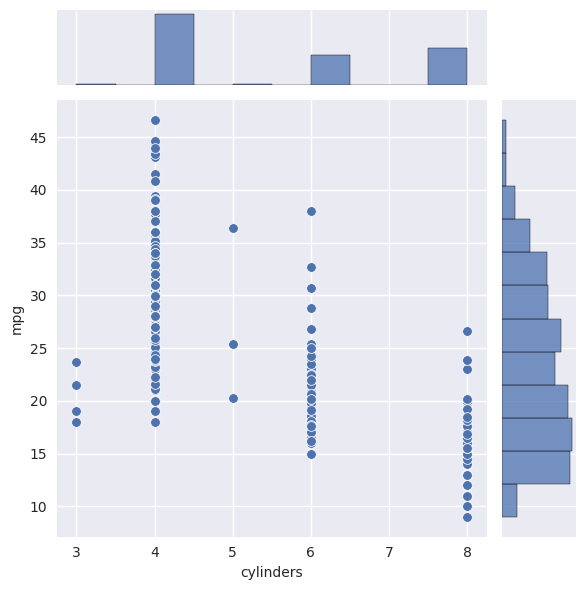

In [37]:
# seaborn scatterplot
pl = sns.jointplot(x='cylinders', y='mpg', data=Auto)

In [39]:
# changing data type of a column into category

Auto['cylinders'] = Auto['cylinders'].astype('category')
Auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger


<Axes: xlabel='cylinders', ylabel='mpg'>

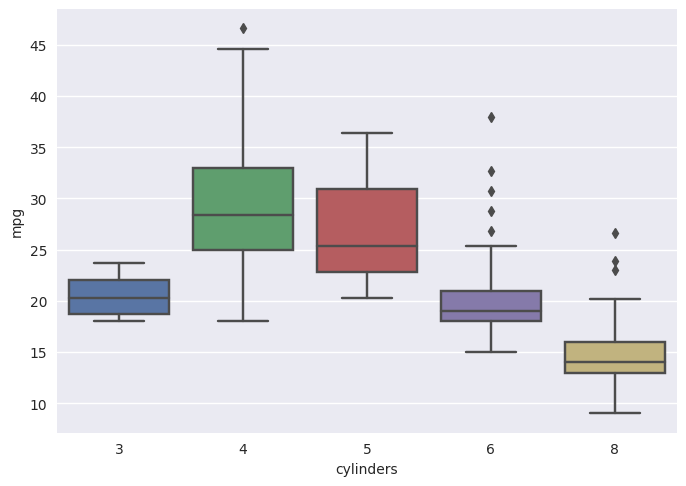

In [40]:
# seaborn boxplot implementation
sns.boxplot(x='cylinders', y='mpg', data=Auto)

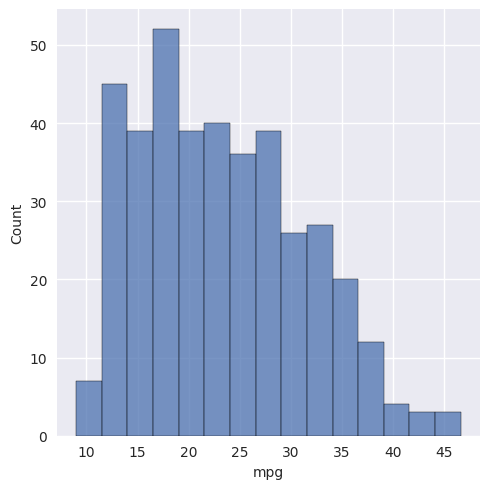

In [41]:
# seaborn enhanced histogram with density plot
sns.displot(Auto['mpg'], bins=15) 

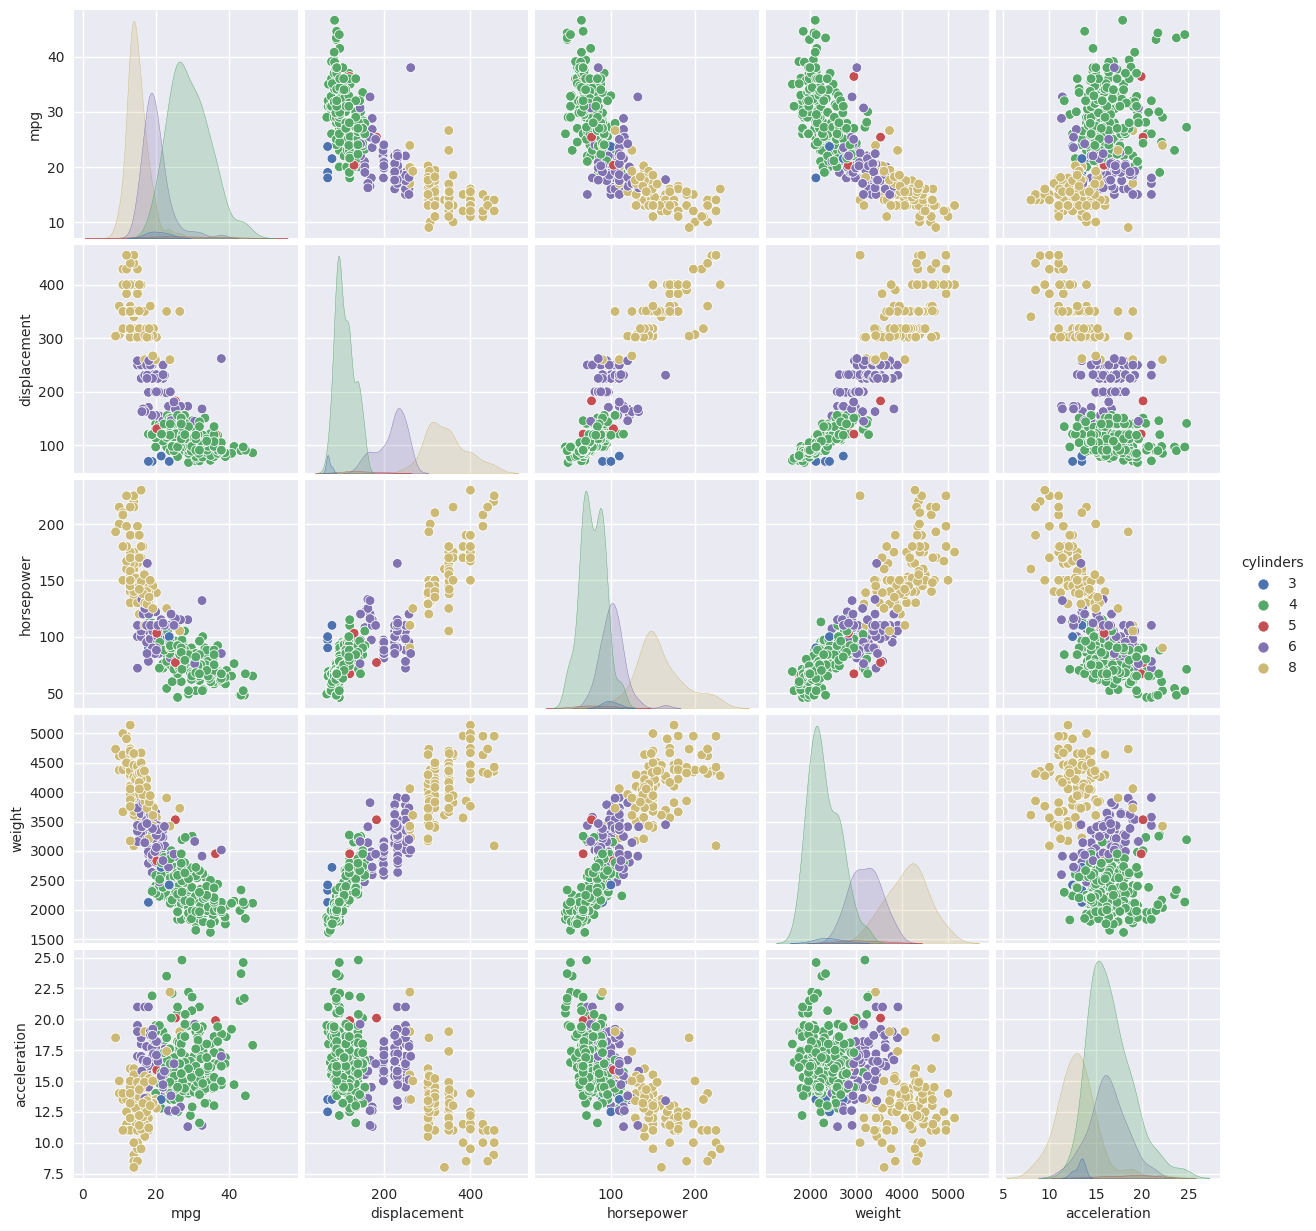

In [42]:
# seaborn pairplot for selected variables ,colored by another
sns.pairplot(Auto, vars=['mpg', 'displacement', 'horsepower','weight','acceleration'], hue='cylinders')

In [43]:
# summary statistics for all dataframe columns, includingnon-numerical ones
Auto.describe(include='all')

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
count,392.00,392.0,392.00,392.00,392.00,392.00,392.00,392.00,392
unique,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,301
top,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,amc matador
freq,NaN,199.0,NaN,NaN,NaN,NaN,NaN,NaN,5
mean,23.45,NaN,194.41,104.47,2977.58,15.54,75.98,1.58,NaN
std,7.81,NaN,104.64,38.49,849.40,2.76,3.68,0.81,NaN
min,9.00,NaN,68.00,46.00,1613.00,8.00,70.00,1.00,NaN
25%,17.00,NaN,105.00,75.00,2225.25,13.78,73.00,1.00,NaN
50%,22.75,NaN,151.00,93.50,2803.50,15.50,76.00,1.00,NaN
75%,29.00,NaN,275.75,126.00,3614.75,17.02,79.00,2.00,NaN
